## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [3]:
# check the shape of training data and testing data 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [4]:
# classify x_train into class1 ans class2
class1 = []
class2 = []

for ind, y in enumerate(y_train):
    if y == 0: 
        class1.append(x_train[ind])
    elif y == 1: 
        class2.append(x_train[ind])

# turn into numpy array
class1 = np.array(class1)
class2 = np.array(class2)

Text(0, 0.5, 'x_train[:,1]')

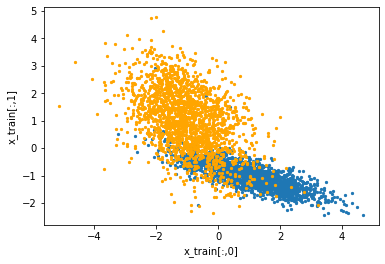

In [5]:
# show the training data
plt.scatter(class1[:,0], class1[:,1], s=5)
plt.scatter(class2[:,0], class2[:,1], s=5, color='orange')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')

## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
# find the mean in class1 and class2
m1 = np.mean(class1, axis=0) # y=0
m2 = np.mean(class2, axis=0) # y=1

In [7]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


Text(0, 0.5, 'x_train[:,1]')

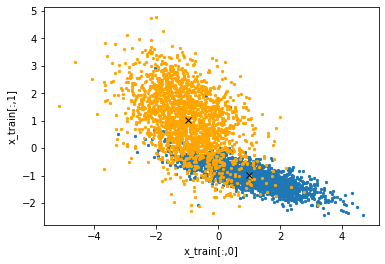

In [8]:
# show the m1 and m2
plt.scatter(class1[:,0], class1[:,1], s=5)
plt.scatter(class2[:,0], class2[:,1], s=5, color='orange')

plt.plot(m1[0], m1[1], 'x', color='black')
plt.plot(m2[0], m2[1], 'x', color='black')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')

## 2. Compute the Within-class scatter matrix SW

In [9]:
# initialize sw, s1, s2
sw = np.zeros((x_train.shape[1], x_train.shape[1]))
s1 = np.zeros((x_train.shape[1], x_train.shape[1]))
s2 = np.zeros((x_train.shape[1], x_train.shape[1]))

# s1 = (c1 - m1)(c1 - m1)T
for c1 in class1:
    swarr1 = (c1 - m1).reshape(2, 1)
    s1 += np.dot(swarr1, swarr1.T)

# s2 = (c2 - m2)(c2 - m2)T
for c2 in class2:   
    swarr2 = (c2 - m2).reshape(2, 1)
    s2 += np.dot(swarr2, swarr2.T)

# sw = s1 + s2
sw = s1 + s2

In [10]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [11]:
# sb = (m2 - m1)(m2 - m1)T
m = (m2 - m1).reshape(2, 1)
sb = np.dot(m, m.T)

In [12]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [13]:
# w = sw inverse dot (m2 - m1)
w = np.dot(np.linalg.inv(sw), (m2-m1).reshape(2,1)) 

In [14]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.000224  ]
 [ 0.00056237]]


In [15]:
# find project dots 
projectDot = []
for x in x_train:
    projectDot.append(w * np.dot(w.T, x) / np.dot(w.T, w))

projectDot = np.array(projectDot)

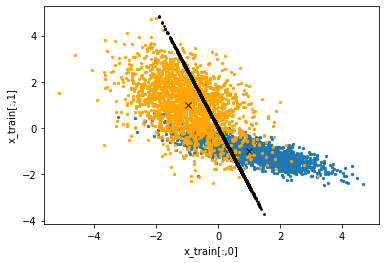

In [16]:
# show the training data
plt.scatter(class1[:,0], class1[:,1], s=5)
plt.scatter(class2[:,0], class2[:,1], s=5, color='orange')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')

# show the m1 and m2
plt.plot(m1[0], m1[1], 'x', color='black')
plt.plot(m2[0], m2[1], 'x', color='black')

# show the projection dots
plt.scatter(projectDot[:,0], projectDot[:,1], s=3, color='black')


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
# find project dots of testing data
projectDotTest = []
for x in x_test:
    projectDotTest.append(w * np.dot(w.T, x) / np.dot(w.T, w))

projectDotTest = np.array(projectDotTest)

In [19]:
# knn function
def knn(k):
    pred =[]
    for testdot in  projectDotTest: # go through every dot which is in projectDotTest 
        distance = [] 
        num = 0 # record how many data is labeled 1
        for traindot in projectDot:
            dist = np.linalg.norm(testdot - traindot) # find euclidean_distance
            distance.append(dist) 
        distance = np.array(distance)
        for i in range(k): # find k nearest-neighbors
            ind = np.argsort(distance)[i]
            num += y_train[ind] 
        if num > (k/2): # num > k/2 -> class1 is more than class2
            pred.append(1)
        elif num == (k/2): # num = k/2 -> use the label of nearest neighbor
            pred.append(np.argsort(distance)[0])
        else: # num < k/2 -> class2 is more than class1
            pred.append(0)
    pred = np.array(pred)
    return pred

In [20]:
# K nearest-neighbor rule -> k = 1
y_pred = knn(1)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8488


In [270]:
# K nearest-neighbor rule -> k = 2
y_pred = knn(2)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.7696


In [271]:
# K nearest-neighbor rule -> k = 3
y_pred = knn(3)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8792


In [272]:
# K nearest-neighbor rule -> k = 4
y_pred = knn(4)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8464


In [273]:
# K nearest-neighbor rule -> k = 5
y_pred = knn(5)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [21]:
slope = float(w[1]/w[0])

In [22]:
print(f"Slope {slope}")

Slope -2.510597155243576


In [23]:
projectDotClass1 = []
projectDotClass2 = []

for c1 in class1:
    projectDotClass1.append(w * np.dot(w.T, c1) / np.dot(w.T,w))

for c2 in class2:
    projectDotClass2.append(w * np.dot(w.T, c2) / np.dot(w.T, w))

projectDotClass1 = np.array(projectDotClass1)
projectDotClass2 = np.array(projectDotClass2)
    #plt.plot([i[0], proj[0]], [i[1], proj[1]],color='blue', linewidth=0.3, alpha=0.5)

c:\Users\user\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0.5, 1.0, 'slope=-2.510597155243576, b=0')

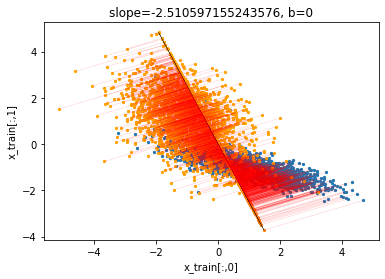

In [24]:
# show the training data
plt.scatter(class1[:,0], class1[:,1], s=5)
plt.scatter(class2[:,0], class2[:,1], s=5, color='orange')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')

# show the projection dot of training data (class1 and class2)
plt.scatter(projectDotClass1[:,0], projectDotClass1[:,1], s=5)
plt.scatter(projectDotClass2[:,0], projectDotClass2[:,1], s=5, color='orange')

# show the projection dots
plt.plot(projectDot[:,0], projectDot[:,1], linewidth=0.3, color='black')

# show the line for the distance from data to projection 
for ind, pc1 in enumerate(projectDotClass1): 
    plt.plot([class1[ind][0], pc1[0]], [class1[ind][1], pc1[1]], color='red', linewidth=0.1)
for ind, pc2 in enumerate(projectDotClass2): 
    plt.plot([class2[ind][0], pc2[0]], [class2[ind][1], pc2[1]], color='red', linewidth=0.1)

# show the slope and intercept on the title
plt.title(f"slope={slope}, b=0")
